# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<br/>
<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

<br/>
<br/>

<center><i><b>
Atenção: não são autorizadas cópias, divulgações ou qualquer tipo de uso deste material sem o consentimento prévio dos autores.
</center></i></b>

# <center>Exercício - Redes Neurais Artificiais </center>

Neste exercício, você irá implementar uma rede neural artificial com *backpropagation* que será aplicada na tarefa de reconhecimento de dígitos manuscritos. Antes de iniciar, é fortemente recomendado que você revise o material apresentado em aula.

## O problema

Você foi contratado por uma grande empresa para fazer a identificação correta e automática de quais dígitos estão presentes em um conjunto de imagens. Essas imagens têm dimensão de 20 x 20 pixels, onde cada pixel é representado por um ponto flutuante que indica a intensidade de tons de cinza naquela região.

Sabe-se que a aplicação de redes neurais utilizando o algoritmo de *backpropagation* neste tipo de problema obtêm resultados satisfatórios. Assim, seu desafio é implementar tal algoritmo e encontrar os pesos ótimos para que a rede seja capaz de identificar automaticamente os dígitos contidos nas imagens.

<center>
<div style="padding: 0px; float: center;">
    <img src="figs/digitos.png"  style="height:400px;"/> 
    <center><em>Figura 1. Amostras do conjunto de dados.</em></center>
</div>
</center>

## Parte 1: Carregando e visualizando os dados

Nessa etapa, você irá completar a função para plotar os dados. O conjunto que você utilizará será de digitos manuscritos (Figura 1).

Cada imagem tem dimensão de 20 x 20 pixels e cada pixel é representado por um ponto flutuante com a intensidade do tom de cinza naquela região. Deste modo, cada amostra é representada pelo desdobramento dos pixels em um vetor com 400 dimensões.

O conjunto de dados contém 5.000 amostras, sendo cada amostra representada por um vetor com 400 dimensões. Portanto, o conjunto é representado por uma matriz [5000,400].

A segunda parte do conjunto de dados é um vetor $y$ com 5.000 dimensões, o qual contém os rótulos para cada amostra da base de treino. Imagens contendo dígitos de 1 a 9 recebem, respectivamente, classes de 1 a 9, enquanto imagens contendo o dígito 0 são rotuladas como 10.

Primeiro, vamos carregar os dados do arquivo.

In [1]:
# -*- coding: utf-8 -*-

import numpy as np  # importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd # importa a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados

# importa o arquivo e guarda em um dataframe do Pandas
df_dataset = pd.read_csv( 'dados.csv', sep=',', header=None) 

print('Dados carregados com sucesso!')

Dados carregados com sucesso!


Vamos guardar os valores dentro de um array X e as classes dentro de um vetor Y.

In [2]:
# Pega os valores das n-1 primeiras colunas e guarda em uma matrix X
X = df_dataset.iloc[:, 0:-1].values 

# Pega os valores da ultima coluna e guarda em um vetor Y
Y = df_dataset.iloc[:, -1].values 

# Imprime as 5 primeiras linhas da matriz X
display('X:', X[0:5,:])

# Imprime os 5 primeiros valores de Y
print('Y:', Y[0:5])

print('\nDimensao de X: ', X.shape)

print('\nDimensao de Y: ', Y.shape)

print('\nClasses do problema: ', np.unique(Y))

'X:'

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

Y: [10 10 10 10 10]

Dimensao de X:  (5000, 400)

Dimensao de Y:  (5000,)

Classes do problema:  [ 1  2  3  4  5  6  7  8  9 10]


Vamos plotar aleatoriamente 100 amostras da base de dados.

In [3]:
import matplotlib.pyplot as plt

def visualizaDados(X):
    example_width = int(round(np.sqrt(X.shape[1])) )

    # Calcula numero de linhas e colunas
    m, n = X.shape
    example_height = int(n / example_width)

    # Calcula numero de itens que serao exibidos
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, axs = plt.subplots(display_rows,display_cols, figsize=(7, 7))
                        
    for ax, i in zip(axs.ravel(), range( X.shape[0] )):
    
        new_X = np.reshape( np.ravel(X[i,:]), (example_width, example_height) )

        ax.imshow(new_X.T, cmap='gray'); 
        ax.axis('off')
    
    plt.show()

idx_perm = np.random.permutation( range(X.shape[0]) )
visualizaDados( X[idx_perm[0:100],:] )

## Parte 2: Carregando os parâmetros

A rede neural proposta para este exercício tem 3 camadas: uma camada de entrada, uma camada oculta e uma camada de saída  (Figura 2). É importante lembrar que a camada de entrada possui 400 neurônios devido ao desdobramento dos pixels das amostras em vetores com 400 dimensões (sem considerar o *bias*, sempre +1).

<center>
<div style="padding: 5px; float: center;">
    <img src="figs/nn.png"  style="height:350px;"/> 
    <center><em>Figura 2. Arquitetura da rede neural.</em></center>
</div>
</center>

Inicialmente, você terá acesso aos parâmetros ($\Theta^{(1)}$, $\Theta^{(2)}$) de uma rede neural já treinada, armazenados nos arquivos **pesos_Theta1.csv** e **pesos_Theta2.csv**. Tais parâmetros têm dimensões condizentes com uma rede neural com 25 neurônios na camada intermediária e 10 neurônios na camada de saída (correspondente às dez possíveis classes).

Agora, vamos carregar os pesos pré-treinados para a rede neural e inicializar os parâmetros mais importantes.

In [4]:
# parametros a serem utilizados neste exercicio
input_layer_size  = 400  # 20x20 dimensao das imagens de entrada
hidden_layer_size = 25   # 25 neuronios na camada oculta
num_labels = 10          # 10 rotulos, de 1 a 10  
                         #  (observe que a classe "0" recebe o rotulo 10)
    
print('\nCarregando parametros salvos da rede neural...\n')

# carregando os pesos da camada 1
Theta1 = pd.read_csv('pesos_Theta1.csv', sep=',', header=None).values

# carregando os pesos da camada 2
Theta2 = pd.read_csv('pesos_Theta2.csv', sep=',', header=None).values

# concatena os pesos em um único vetor
nn_params = np.concatenate([np.ravel(Theta1), np.ravel(Theta2)])

print('Pesos carregados com sucesso!')


Carregando parametros salvos da rede neural...

Pesos carregados com sucesso!


## Parte 3: Calcula o custo (*Feedforward*)

Você precisará implementar a função de custo e gradiente para a rede neural. A função de custo (sem regularização) é descrita a seguir.

$$J(\Theta) = \frac{1}{m} \sum_{i=1}^{m}\sum_{k=1}^{K} \left[-y_k^{(i)} \log\left( \left(h_\Theta(x^{(i)})\right)_k \right) - \left(1 - y_k^{(i)}\right) \log \left( 1 - \left(h_\Theta(x^{(i)} )\right)_k \right)\right]$$

Na função $J$, $h_\Theta(x^{(i)})$ é computado conforme representado na Figura 2. A constante $K$ representa o número de classes. Assim, $h_\Theta(x^{(i)})_k$ = $a^{(3)}_k$ corresponde à ativação (valor de saída) da $k$-ésima unidade de saída. Também, é importante lembrar que o vetor de saída precisa ser criado a partir da classe original, tornando-se compatível com a rede neural, ou seja, espera-se vetores com 10 posições contendo 1 para o elemento referente à classe esperada e 0 nos demais elementos. Por exemplo, seja 5 o rótulo de determinada amostra, o vetor $Y$ correspondente terá 1 na posição $y_5$ e 0 nas demais posições.

Você precisará implementar o algoritmo *feedfoward* para calcular $h_\Theta(x^{(i)})$ para cada amostra $i$ e somar o custo de todas as amostras. Seu código deverá ser flexível para funcionar com conjuntos de dados de qualquer tamanho e qualquer quantidade de classes, considerando $K \geq 3$.

Nesta fase, implemente a função de custo sem regularização para facilitar a análise. Posteriormente, você implementará o custo regularizado.

Antes de implementar a função de custo, você precisará da função sigmoidal.

In [5]:
def sigmoid(z):
    """
    Calcula a função sigmoidal  
    """

    z = 1/(1+np.exp(-z))
    
    return z

# testando a função sigmoidal
z = sigmoid(0)
print('sigmoid de 0 = %1.6f' %(z))

z = sigmoid(10)
print('sigmoid de 10 = %1.6f' %(z))

sigmoid de 0 = 0.500000
sigmoid de 10 = 0.999955


Complete a função que será usada para calcular o custo.

In [6]:
def funcaoCusto(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y):
    '''
    Implementa a funcao de custo para a rede neural com duas camadas
    voltada para tarefa de classificacao
    
    Calcula o custo e gradiente da rede neural. 
    Os parametros da rede neural sao colocados no vetor nn_params
    e precisam ser transformados de volta nas matrizes de peso.
    
    input_layer_size - tamanho da camada de entrada
    hidden_layer_size - tamanho da camada oculta
    num_labels - numero de classes possiveis
    
    O vetor grad de retorno contem todas as derivadas parciais
    da rede neural.
    '''

    # Extrai os parametros de nn_params e alimenta as variaveis Theta1 e Theta2.
    Theta1 = np.reshape( nn_params[0:hidden_layer_size*(input_layer_size + 1)], (hidden_layer_size, input_layer_size+1) )
    Theta2 = np.reshape( nn_params[ hidden_layer_size*(input_layer_size + 1):], (num_labels, hidden_layer_size+1) )

    # Qtde de amostras
    m = X.shape[0]
         
    # A variavel a seguir precisa ser retornada corretamente
    J = 0;
    

    ########################## COMPLETE O CÓDIGO AQUI  ########################
    # Instrucoes: Voce deve completar o codigo a partir daqui 
    #               acompanhando os seguintes passos.
    #
    # (1): Lembre-se de transformar os rotulos Y em vetores com 10 posicoes,
    #         onde tera zero em todas posicoes exceto na posicao do rotulo
    #
    # (2): Execute a etapa de feedforward e coloque o custo na variavel J.
    #
    eps = 1e-15
    y_rotulo = np.zeros((len(y),num_labels),dtype=int)
    for i in range(len(y)) :
        for j in range(num_labels) :
            if j == y[i]-1 :
                y_rotulo[i][j] = 1
            else :
                y_rotulo[i][j] = 0
    
    z2 = np.insert(X,0,1,axis = 1).dot(Theta1.T)
    a2 = sigmoid(z2)
    
    #display(y[0:30])
    
    #a1 = (((-y) * np.log(z1).T) - ((1-y) * (np.log(1-z1).T) ))
    #a1 = a1.T
    
    z3 = np.insert(a2,0,1,axis = 1).dot(Theta2.T)
    a3 = sigmoid(z3) 
    
    #a3 = a3.T
    #print(sum(sum(a2))/m)
    
    J = (1/m) * sum(np.sum(((-y_rotulo) * np.log(a3 + eps)) - ((1-y_rotulo) * (np.log(1-a3 + eps) )),axis=1)) 
    

    print(a3)
    
    
    
    
    
    
    
    
    
    
    
    
    
    

    ##########################################################################

    return J


print('\nFuncao de custo sem regularizacao ...\n')

J = funcaoCusto(nn_params, input_layer_size, hidden_layer_size, num_labels, X, Y)

print('Custo com os parametros (carregados do arquivo): %1.6f ' %J)
print('\n(este valor deve ser proximo de 0.287629)\n')
                  


Funcao de custo sem regularizacao ...

[[  1.12661530e-04   1.74127856e-03   2.52696959e-03 ...,   4.01468105e-04
    6.48072305e-03   9.95734012e-01]
 [  4.79026796e-04   2.41495958e-03   3.44755685e-03 ...,   2.39107046e-03
    1.97025086e-03   9.95696931e-01]
 [  8.85702310e-05   3.24266731e-03   2.55419797e-02 ...,   6.22892325e-02
    5.49803551e-03   9.28008397e-01]
 ..., 
 [  5.17641791e-02   3.81715020e-03   2.96297510e-02 ...,   2.15667361e-03
    6.49826950e-01   2.42384687e-05]
 [  8.30631310e-04   6.22003774e-04   3.14518512e-04 ...,   1.19366192e-02
    9.71410499e-01   2.06173648e-04]
 [  4.81465717e-05   4.58821829e-04   2.15146201e-05 ...,   5.73434571e-03
    6.96288990e-01   8.18576980e-02]]
Custo com os parametros (carregados do arquivo): 0.287629 

(este valor deve ser proximo de 0.287629)



## Parte 4: Regularização

A função de custo com regularização é descrita a seguir.

$$J(\Theta) = \frac{1}{m} \sum_{i=1}^{m}\sum_{k=1}^{K} \left[-y_k^{(i)} \log\left( \left(h_\Theta(x^{(i)})\right)_k \right) - \left(1 - y_k^{(i)}\right) \log \left( 1 - \left(h_\Theta(x^{(i)} )\right)_k \right)\right]$$

$$ + \frac{\lambda}{2m} \left[\sum_{j=1}^{25} \sum_{k=1}^{400} \left(\Theta^{(1)}_{j,k}\right)^2 + \sum_{j=1}^{10} \sum_{k=1}^{25} \left(\Theta^{(2)}_{j,k}\right)^2\right]$$

Você pode assumir que a rede neural terá 3 camadas - uma camada de entrada, uma camada oculta e uma camada de saída. No entanto, seu código deverá ser flexível para suportar qualquer quantidade de neurônios em cada uma dessas camadas. Embora a função $J$ descrita anteriormente contenha números fixos para $\Theta^{(1)}$ e $\Theta^{(2)}$, seu código deverá funcionar para outros tamanhos.

Também, é importante que a regularização não seja aplicada a termos relacionados aos *bias*. Neste contexto, estes termos estão na primeira coluna de cada matriz $\Theta^{(1)}$ e $\Theta^{(2)}$.

A seguir, complete a nova função de custo aplicando regularização.

In [7]:
def funcaoCusto_reg(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, vLambda):
    '''
    Implementa a funcao de custo para a rede neural com duas camadas
    voltada para tarefa de classificacao
    
    Calcula o custo e gradiente da rede neural. 
    Os parametros da rede neural sao colocados no vetor nn_params
    e precisam ser transformados de volta nas matrizes de peso.
    
    input_layer_size - tamanho da camada de entrada
    hidden_layer_size - tamanho da camada oculta
    num_labels - numero de classes possiveis
    lambda - parametro de regularizacao
    
    O vetor grad de retorno contem todas as derivadas parciais
    da rede neural.
    '''

    # Extrai os parametros de nn_params e alimenta as variaveis Theta1 e Theta2.
    Theta1 = np.reshape( nn_params[0:hidden_layer_size*(input_layer_size + 1)], (hidden_layer_size, input_layer_size+1) )
    Theta2 = np.reshape( nn_params[ hidden_layer_size*(input_layer_size + 1):], (num_labels, hidden_layer_size+1) )

    # Qtde de amostras
    m = X.shape[0]
         
    # A variavel a seguir precisa ser retornada corretamente
    J = 0;
    

    ########################## COMPLETE O CÓDIGO AQUI  ########################
    # Instrucoes: Voce deve completar o codigo a partir daqui 
    #               acompanhando os seguintes passos.
    #
    # (1): Lembre-se de transformar os rotulos Y em vetores com 10 posicoes,
    #         onde tera zero em todas posicoes exceto na posicao do rotulo
    #
    # (2): Execute a etapa de feedforward e coloque o custo na variavel J.
    #
    #
    # (3): Implemente a regularização na função de custo.
    #

    eps = 1e-15
    y_rotulo = np.zeros((len(y),num_labels),dtype=int)
    for i in range(len(y)) :
        for j in range(num_labels) :
            if j == y[i]-1 :
                y_rotulo[i][j] = 1
            else :
                y_rotulo[i][j] = 0
    
    z2 = np.insert(X,0,1,axis = 1).dot(Theta1.T)
    a2 = sigmoid(z2)
    
    z3 = np.insert(a2,0,1,axis = 1).dot(Theta2.T)
    a3 = sigmoid(z3) 
    
    reg = sum(np.sum(np.power(Theta1[:,1:],2),axis=1)) + sum(np.sum(np.power(Theta2[:,1:],2),axis=1))
    reg = (vLambda/(2 * m)) * (reg)      
    
    J = (1/m) * sum(np.sum(((-y_rotulo) * np.log(a3 + eps)) - ((1-y_rotulo) * (np.log(1-a3 + eps) )),axis=1)) + reg
    
    
    
    
    
    
    
    
    
    
    
    
    
    

    ##########################################################################

    return J


In [8]:
print('\nChecando a funcao de custo (c/ regularizacao) ... \n')

# Parametro de regularizacao dos pesos (aqui sera igual a 1).
vLambda = 1;

J = funcaoCusto_reg(nn_params, input_layer_size, hidden_layer_size, num_labels, X, Y, vLambda)

print('Custo com os parametros (carregados do arquivo): %1.6f ' %J)
print('\n(este valor deve ser proximo de 0.383770)\n')


Checando a funcao de custo (c/ regularizacao) ... 

Custo com os parametros (carregados do arquivo): 0.383770 

(este valor deve ser proximo de 0.383770)



# Parte 5: Inicialização dos parâmetros

Nesta parte, começa a implementação das duas camadas da rede neural para classificação dos dígitos manuscritos. Os pesos são inicializados aleatoriamente. Mas, para que toda a execução gere o mesmo resultado, vamos usar uma semente para a função de geração de números aleatórios.



In [9]:
def inicializaPesosAleatorios(L_in, L_out, randomSeed = None):
    '''
    Inicializa aleatoriamente os pesos de uma camada usando 
    L_in (conexoes de entrada) e L_out (conexoes de saida).

    W sera definido como uma matriz de dimensoes [L_out, 1 + L_in]
    visto que devera armazenar os termos para "bias".
    
    randomSeed: indica a semente para o gerador aleatorio
    '''

    epsilon_init = 0.12
    
    # se for fornecida uma semente para o gerador aleatorio
    if randomSeed is not None:
        W = np.random.RandomState(randomSeed).rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init
        
    # se nao for fornecida uma semente para o gerador aleatorio
    else:
        W = np.random.rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init
        
    return W


print('\nInicializando parametros da rede neural...\n')
    
initial_Theta1 = inicializaPesosAleatorios(input_layer_size, hidden_layer_size, randomSeed = 10)
initial_Theta2 = inicializaPesosAleatorios(hidden_layer_size, num_labels, randomSeed = 20)

# junta os pesos iniciais em um unico vetor
initial_rna_params = np.concatenate([np.ravel(initial_Theta1), np.ravel(initial_Theta2)])


Inicializando parametros da rede neural...



## Parte 6: Backpropagation

Nesta parte do exercício, você implementará o algoritmo de *backpropagation* responsável por calcular o gradiente para a função de custo da rede neural. Terminada a implementação do cálculo do gradiente, você poderá treinar a rede neural minimizando a função de custo $J(\Theta)$ usando um otimizador avançado, como a funcao `minimize` do ScyPy.

Primeiro, você precisará implementar o gradiente para a rede neural sem regularização. Após ter verificado que o cálculo do gradiente está correto, você implementará o gradiente para a rede neural com regularização.

Você deverá começar pela implementação do gradiente da sigmóide, o qual pode ser calculado utilizando a equação:

$$ g'(z) = \frac{d}{dz}g(z) = g(z)(1-g(z)), $$

sendo que

$$ g(z) = \frac{1}{1 + e^{-z}}. $$

Ao completar, teste diferentes valores para a função `sigmoidGradient`. Para valores grandes de *z* (tanto positivo, quanto negativo), o resultado deve ser próximo a zero. Quando $z = 0$, o resultado deve ser exatamente 0,25. A função deve funcionar com vetores e matrizes também. No caso de matrizes, a função deve calcular o gradiente para cada elemento.

In [10]:
def sigmoidGradient(z):
    '''
    Retorna o gradiente da funcao sigmoidal para z 
    
    Calcula o gradiente da funcao sigmoidal
    para z. A funcao deve funcionar independente se z for matriz ou vetor.
    Nestes casos,  o gradiente deve ser calculado para cada elemento.
    '''
    
    g = np.zeros(z.shape)

    ########################## COMPLETE O CÓDIGO AQUI  ########################
    # Instrucoes: Calcula o gradiente da funcao sigmoidal para 
    #           cada valor de z (seja z matriz, escalar ou vetor).
    #

    g = (1/(1+np.exp(-z))) * (1- (1/(1+np.exp(-z))))

    
    
    
    
    
    
    
    
    
    
    
    
        
    ##########################################################################

    return g

print('\nAvaliando o gradiente da sigmoide...\n')

g = sigmoidGradient(np.array([1,-0.5, 0, 0.5, 1]))
print('Gradiente da sigmoide avaliado em [1 -0.5 0 0.5 1]:\n')
print(g)

print('\nSe sua implementacao estiver correta, o gradiente da sigmoide sera:')
print('[0.19661193 0.23500371 0.25 0.23500371 0.19661193]:\n')


Avaliando o gradiente da sigmoide...

Gradiente da sigmoide avaliado em [1 -0.5 0 0.5 1]:

[ 0.19661193  0.23500371  0.25        0.23500371  0.19661193]

Se sua implementacao estiver correta, o gradiente da sigmoide sera:
[0.19661193 0.23500371 0.25 0.23500371 0.19661193]:



O objetivo do algoritmo *backpropagation* é encontrar a "parcela de responsabilidade" que cada neurônio da rede neural teve com o erro gerado na saída. Dada uma amostra de treino ($x^{(t)}, y^{(t)}$), primeiro é executado o passo de *feedforward* para calcular todas as ativações na rede, incluindo o valor de saída $h_{\Theta}(x)$. Posteriormente, para cada neurônio $j$ na camada $l$, é calculado o "erro" $\delta_{j}^{(l)}$ que mede o quanto determinado neurônio contribuiu para a diferença entre o valor esperado e o valor obtido na saída da rede.

<center>
<div style="padding: 5px; float: center;">
    <img src="figs/nn_back.png"  style="height:350px;"/> 
    <center><em>Figura 3. Arquitetura da rede neural.</em></center>
</div>
</center>

Nos neurônios de saída, a diferença pode ser medida entre o valor esperado (rótulo da amostra) e o valor obtido (a ativação final da rede), onde tal diferença será usada para definir $\delta_{j}^{(3)}$ (visto que a camada 3 é a última). Nas camadas ocultas (quando houver mais de uma), o termo $\delta_{j}^{(l)}$ será calculado com base na média ponderada dos erros encontrados na camada posterior ($l + 1$).

A seguir, é descrito em detalhes como a implementação do algoritmo *backpropagation* deve ser feita. Você precisará seguir os passos 1 a 4 dentro de um laço, processando uma amostra por vez. No passo 5, o gradiente acumulado é dividido pelas *m* amostras, o qual será utilizado na função de custo da rede neural.

 1. Coloque os valores na camada de entrada ($a^{(1)}$) para a amostra de treino a ser processada. Calcule as ativações das camadas 2 e 3 utilizando o passo de *feedforward*. Observe que será necessário adicionar um termo $+1$ para garantir que os vetores de ativação das camadas ($a^{(1)}$) e ($a^{(2)}$) também incluam o neurônio de *bias*.
 
 2. Para cada neurônio $k$ na camada 3 (camada de saída), defina:
    $$ \delta_{k}^{(3)} = (a^{(3)}_k - y_k), $$
    onde $y_k \in \{0,1\}$ indica se a amostra sendo processada pertence a classe $k$ ($y_k = 1$) ou não ($y_k = 0$).
    
 3. Para a camada oculta $l$ = 2, defina:

    $$ \delta^{(2)} = (\Theta^{(2)})^T \delta^{(3)}*g'(z^{(2)}) $$
    
 4. Acumule o gradiente usando a fórmula descrita a seguir. Lembre-se de não utilizar o valor associado ao bias $\delta^{(2)}_0$.
    
    $$ \Delta^{(l)} = \Delta^{(l)} + \delta^{(l+1)}(a^{(l)})^T $$
    
 5. Obtenha o gradiente sem regularização para a função de custo da rede neural dividindo os gradientes acumulados por $\frac{1}{m}$:
 
     $$ D^{(l)}_{ij} = \frac{1}{m}\Delta^{(l)}_{ij} $$

<br />
<br />

Neste ponto, você deverá implementar o algoritmo de *backpropagation*. Crie uma nova função de custo, baseada na função implementada anteriormente, que retorne as derivadas parciais dos parâmetros. Nesta função, você precisará implementar o gradiente para a rede neural sem regularização.

Logo após a função que implementa o algoritmo de *backpropagation*, é chamada uma outra função que fará a checagem do gradiente. O código dessa função está no arquivo **utils.py** que está localizado na pasta raíz desse exercício. Esta checagem tem o propósito de certificar que seu código calcula o gradiente corretamente. Neste passo, se sua implementação estiver correta, você deverá ver uma diferença **menor que 1e-9**.


In [23]:
def funcaoCusto_backp(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y):
    '''
    Implementa a funcao de custo para a rede neural com tres camadas
    voltada para a tarefa de classificacao
    
    Calcula o custo e gradiente da rede neural. 
    Os parametros da rede sao colocados no vetor nn_params
    e precisam ser transformados de volta nas matrizes de peso.
    
    input_layer_size - tamanho da camada de entrada
    hidden_layer_size - tamanho da camada oculta
    num_labels - numero de classes possiveis
    lambda - parametro de regularizacao
    
    O vetor grad de retorno contem todas as derivadas parciais
    da rede neural.
    '''

    # Extrai os parametros de nn_params e alimenta as variaveis Theta1 e Theta2.
    Theta1 = np.reshape( nn_params[0:hidden_layer_size*(input_layer_size + 1)], (hidden_layer_size, input_layer_size+1) )
    Theta2 = np.reshape( nn_params[ hidden_layer_size*(input_layer_size + 1):], (num_labels, hidden_layer_size+1) )

    # Qtde de amostras
    m = X.shape[0]
         
    # As variaveis a seguir precisam ser retornadas corretamente
    J = 0;
    Theta1_grad = np.zeros(Theta1.shape)
    Theta2_grad = np.zeros(Theta2.shape)
    

    ########################## COMPLETE O CÓDIGO AQUI  ########################
    # Instrucoes: Voce deve completar o codigo a partir daqui 
    #               acompanhando os seguintes passos.
    #
    # (1): Lembre-se de transformar os rotulos Y em vetores com 10 posicoes,
    #         onde tera zero em todas posicoes exceto na posicao do rotulo
    #
    # (2): Execute a etapa de feedforward e coloque o custo na variavel J.
    #
    # (3): Implemente o algoritmo de backpropagation para calcular 
    #      os gradientes e alimentar as variaveis Theta1_grad e Theta2_grad.
    #
    #

    eps = 1e-15
    #print(y)
    y_rotulo = np.zeros((len(y),num_labels),dtype=int)
    for i in range(len(y)) :
        for j in range(num_labels) :
            if j == y[i]-1 :
                y_rotulo[i][j] = 1
            else :
                y_rotulo[i][j] = 0

    g2 = np.zeros(Theta2[:,1:].shape)
    
    z2 = np.insert(X,0,1,axis = 1).dot(Theta1.T)

    a2 = sigmoid(z2)
    
    z3 = np.insert(a2,0,1,axis = 1).dot(Theta2.T)
    
    a3 = sigmoid(z3) 
    
    J = (1/m) * sum(np.sum(((-y_rotulo) * np.log(a3 + eps)) - ((1-y_rotulo) * (np.log(1-a3 + eps) )),axis=1))
    
    g3 = (a3 - y_rotulo)
    #print(a3)    
    g2 = (np.dot(g3,Theta2[:,1:]) * (sigmoidGradient(z2)))
    #print(np.dot(g3,Theta2[:,1:]).shape)
    #print(z2.shape)

    a2i = np.insert(a2,0,1, axis = 1)
        
    #print(g2.shape)
    #print(a2i.T.shape)
    #print(Theta2_grad.shape)
    Theta2_grad = Theta2_grad + (g3.T.dot(a2i))   
        
        #print(X[i].reshape(len(X[i]),1).shape)
    xi = np.insert(X,0,1,axis = 1)
    Theta1_grad = Theta1_grad + (g2.T.dot(xi))  
        #print('-----------------------------')
    Theta2_grad = Theta2_grad/m
    Theta1_grad = Theta1_grad/m
    print(Theta1_grad.shape)
    print(Theta2_grad.shape)

    
    
    
    
    
    
    
    
    
    
    
    
    

    ##########################################################################

    # Junta os gradientes
    grad = np.concatenate([np.ravel(Theta1_grad), np.ravel(Theta2_grad)])

    return J, grad






# executa o arquivo que contem a funca que faz a checagem do gradiente
%run utils.py
verificaGradiente(funcaoCusto_backp)

(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)
(3, 6)
(5, 4)

## Parte 7: Outra parte da regularização

Agora, a regularização deverá ser adicionada após se calcular o gradiente durante o algoritmo de *backpropagation*. Lembre-se que a regularização não é adicionada quando $j = 0$, ou seja, na primeira coluna de $\Theta$. Portanto, para $j \geq 1$, o gradiente é descrito como:

$$ D^{(l)}_{ij} = \frac{1}{m}\Delta^{(l)}_{ij} + \frac{\lambda}{m}\Theta^{(l)}_{ij} $$

<br/>
<br/>

Você deverá criar uma nova função de custo que é uma atualização da função anterior, mas com regularização e gradiente.

Logo após a função que implementa o algoritmo de *backpropagation* com regularização, a função que faz a checagem do gradiente será chamada novamente. Se sua implementação estiver correta, você deverá ver uma diferença **menor que 1e-9**.

In [12]:
def funcaoCusto_backp_reg(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, vLambda):
    '''
    Implementa a funcao de custo para a rede neural com tres camadas
    voltada para tarefa de classificacao
    
    Calcula o custo e gradiente da rede neural. 
    Os parametros da rede neural sao colocados no vetor nn_params
    e precisam ser transformados de volta nas matrizes de peso.
    
    input_layer_size - tamanho da camada de entrada
    hidden_layer_size - tamanho da camada oculta
    num_labels - numero de classes possiveis
    lambda - parametro de regularizacao
    
    O vetor grad de retorno contem todas as derivadas parciais
    da rede neural.
    '''

    # Extrai os parametros de nn_params e alimenta as variaveis Theta1 e Theta2.
    Theta1 = np.reshape( nn_params[0:hidden_layer_size*(input_layer_size + 1)], (hidden_layer_size, input_layer_size+1) )
    Theta2 = np.reshape( nn_params[ hidden_layer_size*(input_layer_size + 1):], (num_labels, hidden_layer_size+1) )

    # Qtde de amostras
    m = X.shape[0]
         
    # As variaveis a seguir precisam ser retornadas corretamente
    J = 0;
    Theta1_grad = np.zeros(Theta1.shape)
    Theta2_grad = np.zeros(Theta2.shape)
    

    ########################## COMPLETE O CÓDIGO AQUI  ########################
    # Instrucoes: Voce deve completar o codigo a partir daqui 
    #               acompanhando os seguintes passos.
    #
    # (1): Lembre-se de transformar os rotulos Y em vetores com 10 posicoes,
    #         onde tera zero em todas posicoes exceto na posicao do rotulo
    #
    # (2): Execute a etapa de feedforward e coloque o custo na variavel J.
    #
    # (3): Implemente o algoritmo de backpropagation para calcular 
    #      os gradientes e alimentar as variaveis Theta1_grad e Theta2_grad.
    #
    # (4): Implemente a regularização na função de custo e gradiente.
    #

    eps = 1e-15
    y_rotulo = np.zeros((len(y),num_labels),dtype=int)
    for i in range(len(y)) :
        for j in range(num_labels) :
            if j == y[i]-1 :
                y_rotulo[i][j] = 1
            else :
                y_rotulo[i][j] = 0

    z2 = np.insert(X,0,1,axis = 1).dot(Theta1.T)
    a2 = sigmoid(z2)
    
    z3 = np.insert(a2,0,1,axis = 1).dot(Theta2.T)
    a3 = sigmoid(z3) 
    
    reg = sum(np.sum(np.power(Theta1[:,1:],2),axis=1)) + sum(np.sum(np.power(Theta2[:,1:],2),axis=1))
    reg = (vLambda/(2 * m)) * (reg)      
    
    
    J = (1/m) * sum(sum(((-y_rotulo) * np.log(a3 + eps)) - ((1-y_rotulo) * (np.log(1-a3 + eps) )))) + reg  
    #print(reg)
    #print( (1/m) * sum(sum(((-y_rotulo) * np.log(a3 + eps)) - ((1-y_rotulo) * (np.log(1-a3 + eps) )))))
    
    g3 = (a3 - y_rotulo)
        
    g2 = ((g3).dot(Theta2[:,1:]) * (sigmoidGradient(z2)))

    a2i = np.insert(a2,0,1, axis = 1)
        
    #print(g3.shape)
    #print(a2i.T.shape)
    #print(Theta2_grad.shape)
    Theta2_grad = Theta2_grad + (g3.T.dot(a2i))   
        
    xi = np.insert(X,0,1,axis = 1)
    Theta1_grad = Theta1_grad + (g2.T.dot(xi))  

    
    Theta2_grad = (Theta2_grad/m) 
    Theta2_grad[:,1:] = Theta2_grad[:,1:] + ((vLambda/m)*Theta2[:,1:])
    Theta1_grad = (Theta1_grad/m)
    
    Theta1_grad[:,1:] = Theta1_grad[:,1:] + ((vLambda/m)*Theta1[:,1:])
    #print('end : ')
    #print(np.ravel(Theta1_grad))
    #print(J)
    
    
    
    
    

    ##########################################################################

    # Junta os gradientes
    grad = np.concatenate([np.ravel(Theta1_grad), np.ravel(Theta2_grad)])

    return J, grad




# Parametro de regularizacao dos pesos.
vLambda = 3;


# executa o arquivo que contem a funca que faz a checagem do gradiente. 
# Desa vez o valor de lambda tambem e informado
%run utils.py
verificaGradiente(funcaoCusto_backp_reg, vLambda=vLambda)


print('\n\nChecando a funcao de custo (c/ regularizacao) ... \n')

J, grad = funcaoCusto_backp_reg(nn_params, input_layer_size, hidden_layer_size, num_labels, X, Y, vLambda)

print('Custo com os parametros (carregados do arquivo): %1.6f' %J)
print('\n(este valor deve ser proximo de 0.576051 (para lambda = 3))\n')

[[ 0.0176654   0.0176654 ]
 [ 0.05504145  0.05504145]
 [ 0.00917397  0.00917397]
 [-0.04512802 -0.04512802]
 [ 0.0097088   0.0097088 ]
 [-0.01652822 -0.01652822]
 [ 0.03970285  0.03970285]
 [ 0.0594313   0.0594313 ]
 [-0.00718128 -0.00718128]
 [-0.03286988 -0.03286988]
 [-0.06040096 -0.06040096]
 [-0.03239967 -0.03239967]
 [-0.01748275 -0.01748275]
 [ 0.05895294  0.05895294]
 [ 0.03830022  0.03830022]
 [-0.01756555 -0.01756555]
 [-0.01169206 -0.01169206]
 [-0.04535299 -0.04535299]
 [ 0.00861934  0.00861934]
 [ 0.05466708  0.05466708]
 [ 0.10934772  0.10934772]
 [ 0.11135436  0.11135436]
 [ 0.06099703  0.06099703]
 [ 0.00994614  0.00994614]
 [-0.00160637 -0.00160637]
 [ 0.03558854  0.03558854]
 [ 0.108133    0.108133  ]
 [ 0.11609346  0.11609346]
 [ 0.0761714   0.0761714 ]
 [ 0.02218834  0.02218834]
 [-0.00430676 -0.00430676]
 [ 0.01898519  0.01898519]
 [ 0.50627037  0.50627037]
 [ 0.32331662  0.32331662]
 [ 0.28023275  0.28023275]
 [ 0.24070291  0.24070291]
 [ 0.20104807  0.20104807]
 

## Parte 8: Treinando a rede neural

Neste ponto, todo o código necessário para treinar a rede está pronto.
Aqui, será utilizada a funcao `minimize` do ScyPy para treinar as funções de custo
de forma eficiente utilizando os gradientes calculados.

In [13]:
import scipy
import scipy.optimize

print('\nTreinando a rede neural.......')
print('.......(Aguarde, pois esse processo por ser um pouco demorado.)\n')

# Apos ter completado toda a tarefa, mude o parametro MaxIter para
# um valor maior e verifique como isso afeta o treinamento.
MaxIter = 500

# Voce tambem pode testar valores diferentes para lambda.
vLambda = 1

# Minimiza a funcao de custo
result = scipy.optimize.minimize(fun=funcaoCusto_backp_reg, x0=initial_rna_params, args=(input_layer_size, hidden_layer_size, num_labels, X, Y, vLambda),  
                method='TNC', jac=True, options={'maxiter': MaxIter})

# Coleta os pesos retornados pela função de minimização
nn_params = result.x

# Obtem Theta1 e Theta2 back a partir de rna_params
Theta1 = np.reshape( nn_params[0:hidden_layer_size*(input_layer_size + 1)], (hidden_layer_size, input_layer_size+1) )
Theta2 = np.reshape( nn_params[ hidden_layer_size*(input_layer_size + 1):], (num_labels, hidden_layer_size+1) )

print(result)


Treinando a rede neural.......
.......(Aguarde, pois esse processo por ser um pouco demorado.)

     fun: 0.3144191208402195
     jac: array([ -4.05558152e-05,  -1.01724948e-07,   9.09124034e-09, ...,
        -4.84460679e-06,   9.73372681e-06,   1.99005450e-05])
 message: 'Max. number of function evaluations reached'
    nfev: 500
     nit: 32
  status: 3
 success: False
       x: array([ -1.21581092e+00,  -5.08624740e-04,   4.54562017e-05, ...,
         3.73906205e-01,   2.19130422e+00,   1.12920299e+00])


## Parte 9: Visualizando os pesos


Uma das formas de entender o que a rede neural está aprendendo, é visualizar a representação capturada nos neurônios da camada oculta. Informalmente, dado um neurônio de uma camada oculta qualquer, uma das formas de visualizar o que esse neurônio calcula, é encontrar uma entrada *x* que o fará ser ativado (ou seja, um resultado próximo a 1). Para a rede neural que foi treinada, perceba que a $i$-ésima linha de $\Theta^{(1)}$ é um vetor com 401 dimensões, o qual representa os parâmetros para o $i$-ésimo neurônio. Se descartarmos o termo *bias*, teremos um vetor de 400 dimensões que representa o peso para cada pixel a partir da camada de entrada. Deste modo, uma das formas de visualizar a representação capturada pelo neurônio da camada oculta, é reorganizar essas 400 dimensões em uma imagem de 20 x 20 pixels e exibi-la. 

O script a seguir irá exibir uma imagem com 25 unidades, cada uma correspondendo a um neurônio da camada oculta.


Visualizando a rede neural... 

(5000, 400)
(25, 400)


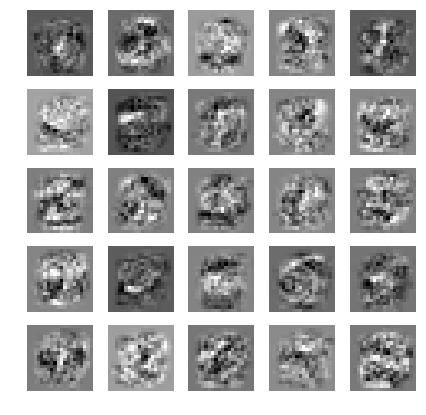

In [14]:
print('\nVisualizando a rede neural... \n')

print(X.shape)
print(Theta1[:, 1:].shape)

visualizaDados(Theta1[:, 1:])
plt.show()


## Parte 10: Predição

Após treinar a rede neural, ela será utilizada para predizer
os rótulos das amostras. Neste ponto, foi implementada a função de predição
para que a rede neural seja capaz de prever os rótulos no conjunto de dados
e calcular a acurácia do método.

In [15]:
def predicao(Theta1, Theta2, X):
    '''
    Prediz o rotulo de uma amostra apresentada a rede neural
    
    Prediz o rotulo de X ao utilizar
    os pesos treinados na rede neural (Theta1, Theta2)
    '''
    
    m = X.shape[0] # número de amostras
    num_labels = Theta2.shape[0]
    
    p = np.zeros(m)

    a1 = np.hstack( [np.ones([m,1]),X] )
    h1 = sigmoid( np.dot(a1,Theta1.T) )

    a2 = np.hstack( [np.ones([m,1]),h1] ) 
    h2 = sigmoid( np.dot(a2,Theta2.T) )
    
    p = np.argmax(h2,axis=1)
    p = p+1
    
    return p
    

pred = predicao(Theta1, Theta2, X)

print('\nAcuracia no conjunto de treinamento: %f\n'%( np.mean( pred == Y ) * 100) )

print('\nAcuracia esperada: 99.56% (aproximadamente)')


Acuracia no conjunto de treinamento: 99.580000


Acuracia esperada: 99.56% (aproximadamente)
